# Configuração inicial

In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'width': 1024, 'height': 768, 'scroll': True}

# Raízes (ou zeros)

## Motivação: Exemplo do saltador de Bungee jumping

CHAPRA, S. C. "Métodos numéricos aplicados com MATLAB para engenheiros e cientistas" 

### Definição do problema

Encontre a massa que faz com que um saltador de bungee jumping ultrapasse a velocidade de 36m/s após 4s de queda livre.

A velocidade é dada pela equação:

\begin{equation} \label{eq:jump1}
v(t) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right)
\end{equation}

Suponha que:

* $c_d = 0.25 kg/m$
* $g = 9.8m/s^2$

### Primeira tentativa

Isolar $m$ da equação \ref{eq:jump1}

$
m = f(v,g,c_d,t)
$

Porém, é muito difícil manipular a eq. \ref{eq:jump1} e isolar $m$!


## Solução

### Criando uma nova função

\begin{equation} \label{eq:jump2}
f(m) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right) -v(t)
\end{equation}

Transformamos o problema original em encontrar as raízes (zeros) de $f(m)$!

# Método da força bruta

* O mais simples deles
* Baixa precisão
* Consiste em determinar diversos valores de $f(m)$ e inspecionar manualmente

\begin{equation} 
f(m) = \sqrt{\dfrac{gm}{c_d}}\tanh\left( \sqrt{\dfrac{gc_d}{m}t}\right) -v(t)
\end{equation}

In [4]:
import math as m
import numpy as np

In [23]:
g = 9.8
cd = 0.25
v = 36
t = 4
for massa in np.arange(1,200):
    fm = m.sqrt( g*massa/cd ) * m.tanh( m.sqrt( g*cd/massa ) * t ) - v
    print(massa, ' ', fm)

1   -29.739055313374248
2   -27.148150212175384
3   -25.171355940044634
4   -23.52574598559208
5   -22.103158717184208
6   -20.847419510719234
7   -19.72401784137689
8   -18.70941828686855
9   -17.78643066881717
10   -16.94189699222089
11   -16.16540556929919
12   -15.44851445243664
13   -14.78425082458541
14   -14.16677111046278
15   -13.591120441933999
16   -13.053056658792546
17   -12.548917994001798
18   -12.075521366664383
19   -11.63008274964912
20   -11.21015385033665
21   -10.813571098147143
22   -10.43841408136031
23   -10.082971349857463
24   -9.745712035548703
25   -9.425262120613795
26   -9.12038445659044
27   -8.829961837684287
28   -8.552982581065613
29   -8.288528179878607
30   -8.035762681175282
31   -7.79392350794696
32   -7.562313496795053
33   -7.340293964115695
34   -7.1272786465670315
35   -6.922728387966075
36   -6.726146466062975
37   -6.537074469951676
38   -6.355088653029156
39   -6.1797966980501755
40   -6.010834840438658
41   -5.847865303999146
42   -5.690574

<div class="alert alert-block alert-info">Analisando os dados, vemos que a raíz encontra-se entre 144kg e 145kg.</div>

# Método gráfico

* Um pouco mais refinado
* Permite analisar melhor a função
* Ainda é manual
* Baixa precisão

In [6]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib widget

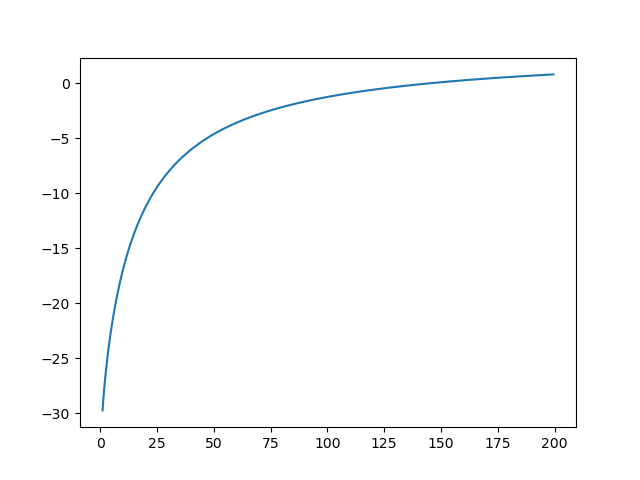

In [7]:
g = 9.8
cd = 0.25
v = 36
t = 4
massa = np.arange(1,200, 0.5)
fm = np.sqrt( g*massa/cd ) * np.tanh( np.sqrt( g*cd/massa ) * t ) - v

plt.plot(massa, fm)
mplcursors.cursor(hover=True)

# Utilizando bibliotecas nativas

* Alta precisão
* Simples
* É preciso entender **quando elas falham!**

In [12]:
import numpy as np
from scipy.optimize import fsolve

In [11]:
def jump(massa):
    g = 9.8
    cd = 0.25
    v = 36
    t = 4
    fm = np.sqrt( g*massa/cd ) * np.tanh( np.sqrt( g*cd/massa ) * t ) - v
    return fm

In [18]:
root = fsolve(jump, 140)
print(root)

[144.40669396]


# Métodos intervalares

## Método da bissecção

## Método da falsa posição

# Métodos abertos

## Iteração do ponto fixo

## Método de Newton-Raphson

## Método da Secante